# Student Performance Prediction

# Problem Statement
Predict students' final grades based on features like study hours, attendance, previous grades, and other related factors. This will help identify areas of improvement for students and educators.

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
df = pd.read_csv('student-mat.csv',sep=';')

In [26]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [28]:
df.shape

(395, 33)

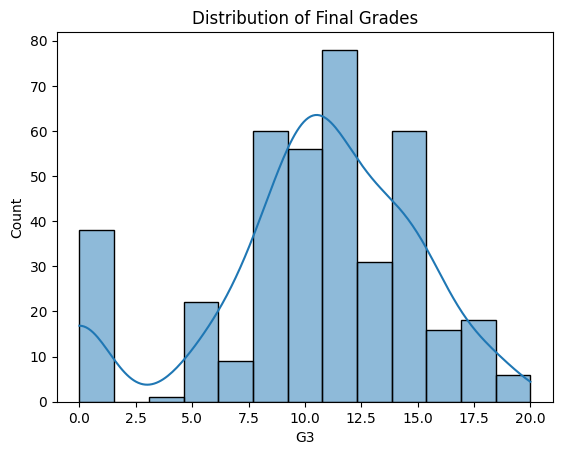

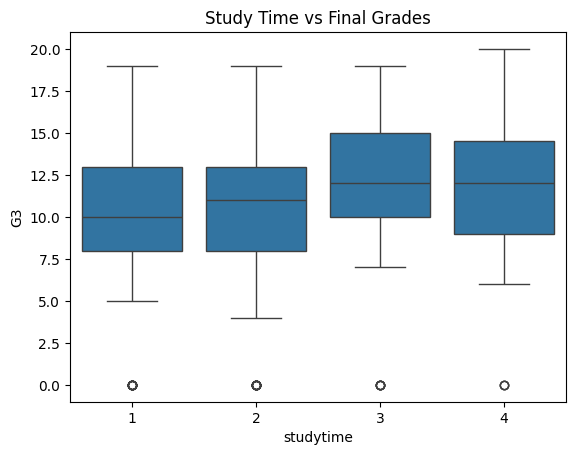

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of target variable
sns.histplot(df['G3'], kde=True)
plt.title("Distribution of Final Grades")
plt.show()

# Relationship between study time and grades
sns.boxplot(x='studytime', y='G3', data=df)
plt.title("Study Time vs Final Grades")
plt.show()

# Linear Regression

In [30]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = label_encoder.fit_transform(df[col])

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X = df.drop('G3',axis=1) # Input Features
y = df['G3'] # Target

In [33]:
X

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
0,0,0,18,1,0,0,4,4,0,4,...,0,4,3,4,1,1,3,6,5,6
1,0,0,17,1,0,1,1,1,0,2,...,0,5,3,3,1,1,3,4,5,5
2,0,0,15,1,1,1,1,1,0,2,...,0,4,3,2,2,3,3,10,7,8
3,0,0,15,1,0,1,4,2,1,3,...,1,3,2,2,1,1,5,2,15,14
4,0,0,16,1,0,1,3,3,2,2,...,0,4,3,2,1,2,5,4,6,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1,1,20,1,1,0,2,2,3,3,...,0,5,5,4,4,5,4,11,9,9
391,1,1,17,1,1,1,3,1,3,3,...,0,2,4,5,3,4,2,3,14,16
392,1,1,21,0,0,1,1,1,2,2,...,0,5,5,3,3,3,3,3,10,8
393,1,1,18,0,1,1,3,2,3,2,...,0,4,4,1,3,4,5,0,11,12


In [34]:
y

0       6
1       6
2      10
3      15
4      10
       ..
390     9
391    16
392     7
393    10
394     9
Name: G3, Length: 395, dtype: int64

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [36]:
X_train.shape

(316, 32)

In [37]:
X_test.shape

(79, 32)

In [38]:
from sklearn.linear_model import LinearRegression

In [39]:
lr = LinearRegression()

In [41]:
lr.fit(X_train,y_train)

LinearRegression()

In [43]:
y_pred = lr.predict(X_test)

In [44]:
from sklearn.metrics import *

In [45]:
r2_score(y_test,y_pred)

0.7545777855043501

In [47]:
mean_absolute_error(y_test,y_pred)

np.float64(1.4954750100522758)

In [48]:
mean_squared_error(y_test,y_pred)

np.float64(5.03239410886674)

In [49]:
# Evaluate
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse}, MAE: {mae}, R²: {r2}")


MSE: 5.03239410886674, MAE: 1.4954750100522758, R²: 0.7545777855043501


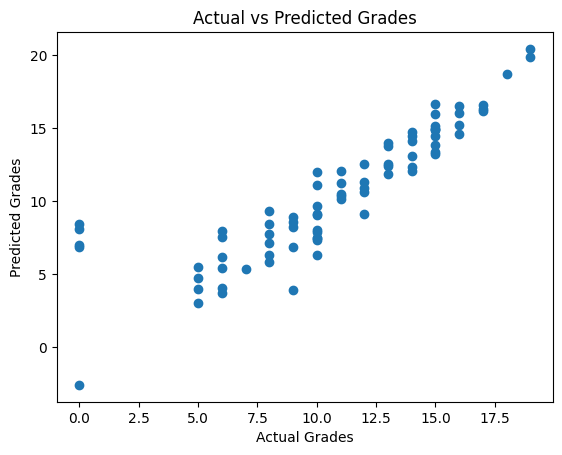

In [50]:
# Plot actual vs predicted
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Grades")
plt.ylabel("Predicted Grades")
plt.title("Actual vs Predicted Grades")
plt.show()

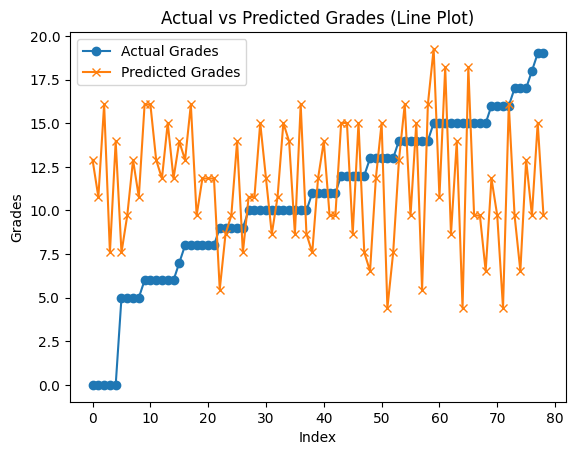

In [68]:
# Sort values
y_test_sorted = np.array(y_test.sort_values())
y_pred_sorted = y_pred[np.argsort(y_test.index)]

# Plot
plt.plot(y_test_sorted, label="Actual Grades", marker='o')
plt.plot(y_pred_sorted, label="Predicted Grades", marker='x')
plt.xlabel("Index")
plt.ylabel("Grades")
plt.title("Actual vs Predicted Grades (Line Plot)")
plt.legend()
plt.show()

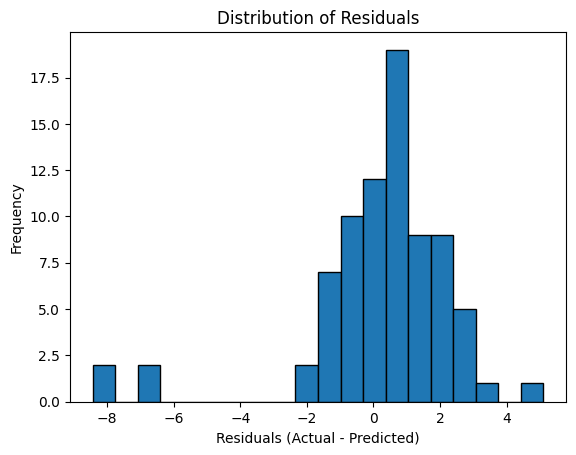

In [53]:
plt.hist(y_test - y_pred, bins=20, edgecolor='k')
plt.xlabel("Residuals (Actual - Predicted)")
plt.ylabel("Frequency")
plt.title("Distribution of Residuals")
plt.show()


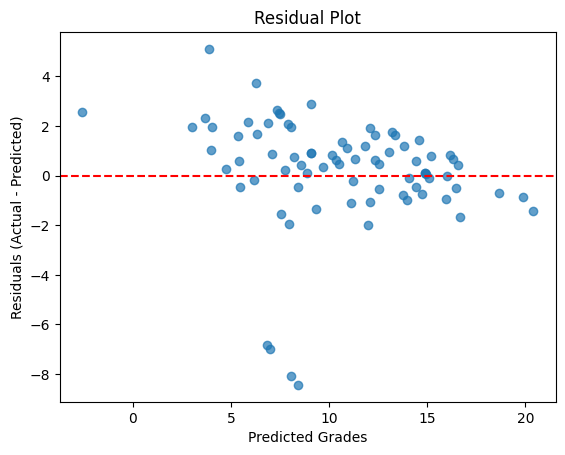

In [54]:
residuals = y_test - y_pred

plt.scatter(y_pred, residuals, alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--')  # Zero residual line
plt.xlabel("Predicted Grades")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residual Plot")
plt.show()


C:\Users\Sujoy\AppData\Local\Temp\ipykernel_11536\2616708134.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_test, label="Actual Grades", shade=True)
C:\Users\Sujoy\AppData\Local\Temp\ipykernel_11536\2616708134.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_pred, label="Predicted Grades", shade=True)


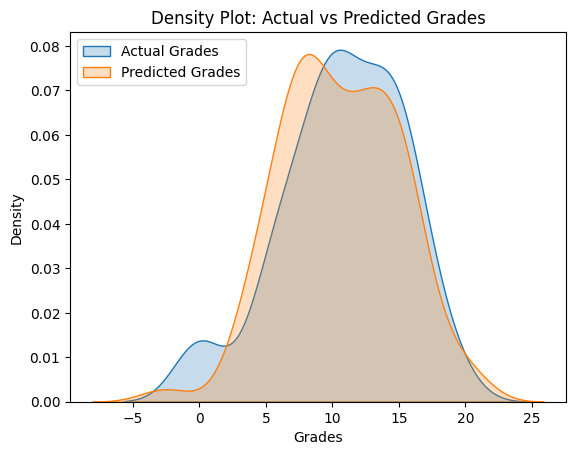

In [55]:
sns.kdeplot(y_test, label="Actual Grades", shade=True)
sns.kdeplot(y_pred, label="Predicted Grades", shade=True)
plt.xlabel("Grades")
plt.title("Density Plot: Actual vs Predicted Grades")
plt.legend()
plt.show()

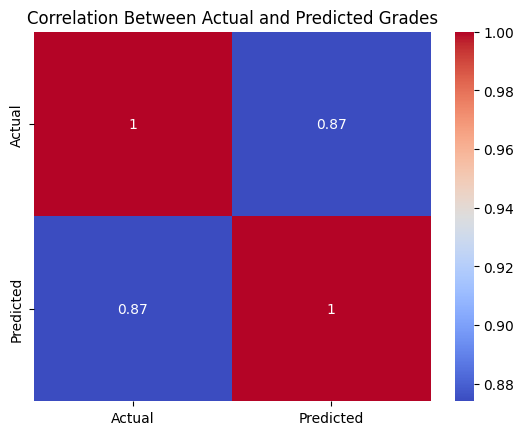

In [56]:
sns.heatmap(pd.DataFrame({"Actual": y_test, "Predicted": y_pred}).corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Between Actual and Predicted Grades")
plt.show()


In [62]:
# Feature importance
coefficients = pd.DataFrame(lr.coef_, X.columns, columns=['Coefficient'])
print(coefficients.sort_values(by='Coefficient', ascending=False))

            Coefficient
G2             0.954569
schoolsup      0.750961
sex            0.293869
famrel         0.289210
G1             0.206123
famsup         0.176043
goout          0.171814
traveltime     0.140033
higher         0.139570
Medu           0.115051
school         0.102232
Walc           0.079488
paid           0.074292
guardian       0.068365
health         0.054508
absences       0.049504
Mjob           0.029831
freetime       0.006264
famsize       -0.002486
studytime     -0.015085
reason        -0.030119
address       -0.050034
Pstatus       -0.051899
Fjob          -0.145604
age           -0.156879
Fedu          -0.161838
Dalc          -0.174827
internet      -0.234635
nursery       -0.265092
failures      -0.385971
romantic      -0.407915
activities    -0.585128


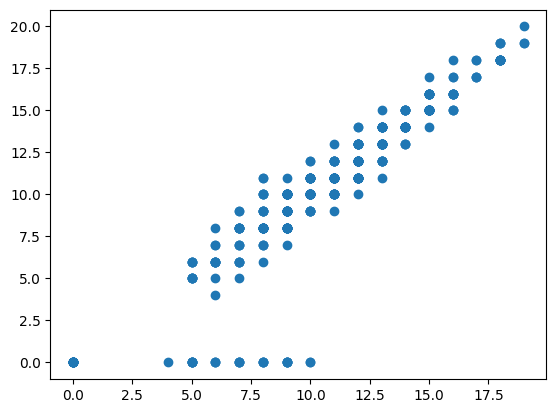

In [58]:
plt.scatter(df['G2'],df['G3'])

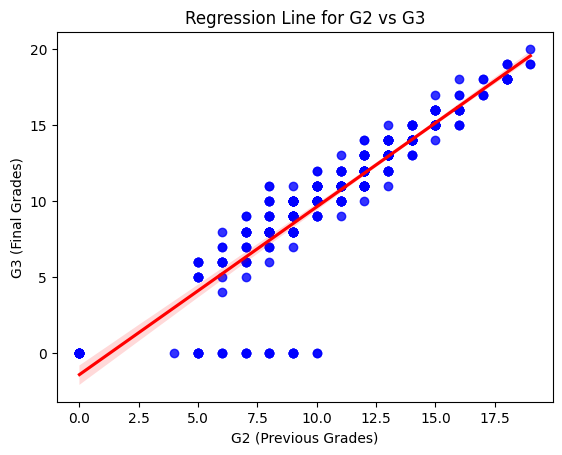

In [59]:
sns.regplot(x=df['G2'], y=df['G3'], scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.xlabel("G2 (Previous Grades)")
plt.ylabel("G3 (Final Grades)")
plt.title("Regression Line for G2 vs G3")
plt.show()

# Gradient Descent

In [64]:
# Features and target
X = df['G2'].values
y = df['G3'].values

# Initialize parameters
theta_0 = 0  # Intercept
theta_1 = 0  # Slope
learning_rate = 0.01
epochs = 1000  # Number of iterations
m = len(y)  # Number of data points

In [65]:
for _ in range(epochs):
    # Predicted values
    y_pred = theta_0 + theta_1 * X

    # Compute gradients
    d_theta_0 = (1 / m) * np.sum(y_pred - y)
    d_theta_1 = (1 / m) * np.sum((y_pred - y) * X)

    # Update parameters
    theta_0 -= learning_rate * d_theta_0
    theta_1 -= learning_rate * d_theta_1

print(f"Optimized Parameters: theta_0 = {theta_0}, theta_1 = {theta_1}")


Optimized Parameters: theta_0 = -0.8960777669939819, theta_1 = 1.060794769674646


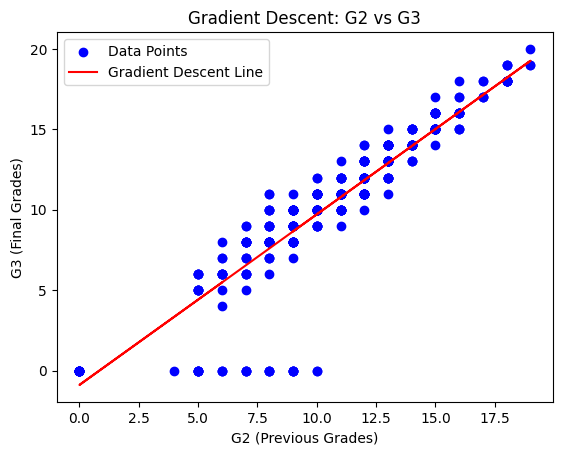

In [66]:
# Regression line
y_regression = theta_0 + theta_1 * X

# Plot scatter and regression line
plt.scatter(X, y, color="blue", label="Data Points")
plt.plot(X, y_regression, color="red", label="Gradient Descent Line")
plt.xlabel("G2 (Previous Grades)")
plt.ylabel("G3 (Final Grades)")
plt.title("Gradient Descent: G2 vs G3")
plt.legend()
plt.show()


In [67]:
mse = np.mean((y - y_regression) ** 2)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 3.8209911402834615
